In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
from matplotlib import style 
plt.style.use(['dark_background'])
import matplotlib.patches as mpatches
import plotly.express as px
import seaborn as sns  
sns.set(color_codes = True)
sns.set(style="whitegrid")

In [2]:
df=pd.read_excel(r"C:/Users/Lenovo/Desktop/Space_data.xlsx")

In [3]:
df.shape

(4324, 9)

In [4]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      4324 non-null   int64  
 1   Unnamed: 0.1    4324 non-null   int64  
 2   Company Name    4324 non-null   object 
 3   Location        4324 non-null   object 
 4   Datum           4324 non-null   object 
 5   Detail          4324 non-null   object 
 6   Status Rocket   4324 non-null   object 
 7    Rocket         964 non-null    float64
 8   Status Mission  4324 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 304.2+ KB


In [6]:
df.isnull().sum()

Unnamed: 0           0
Unnamed: 0.1         0
Company Name         0
Location             0
Datum                0
Detail               0
Status Rocket        0
 Rocket           3360
Status Mission       0
dtype: int64

In [7]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,Rocket
count,4324.000000,4324.000000,964.000000
mean,2161.500000,2161.500000,153.792199
std,1248.375611,1248.375611,288.450732
min,0.000000,0.000000,5.300000
25%,1080.750000,1080.750000,40.000000
50%,2161.500000,2161.500000,62.000000
75%,3242.250000,3242.250000,164.000000
max,4323.000000,4323.000000,5000.000000


Data Cleaning Section

Unnamed: 0 and Unnamed: 0.1 are pretty useless columns so we dropped them and

Rocket is basically the mission cost in $ Million so we renamed the column as Mission Cost


In [8]:
df.drop(['Unnamed: 0','Unnamed: 0.1'], axis =1, inplace = True)
df.rename(columns = {' Rocket' : 'Mission Cost'}, inplace = True)

In [9]:
Location = df.Location.str.split(',', expand = True) # site,centre name,place,country split
Location

,0,1,2,3
0,LC-39A,Kennedy Space Center,Florida,USA
1,Site 9401 (SLS-2),Jiuquan Satellite Launch Center,China,None
2,Pad A,Boca Chica,Texas,USA
3,Site 200/39,Baikonur Cosmodrome,Kazakhstan,None
4,SLC-41,Cape Canaveral AFS,Florida,USA
...,...,...,...,...
4319,LC-18A,Cape Canaveral AFS,Florida,USA
4320,LC-26A,Cape Canaveral AFS,Florida,USA
4321,LC-18A,Cape Canaveral AFS,Florida,USA
4322,Site 1/5,Baikonur Cosmodrome,Kazakhstan,None


In [10]:
Location[3].isnull().sum() 

2674

In [11]:
#Filling the missing values
for i in range(len(Location)) : 
    if Location[3].loc[i] == None : 
        for x in Location[2].unique() : 
            if Location[2].loc[i] == x :
                Location[3].loc[i] = x
Location

,0,1,2,3
0,LC-39A,Kennedy Space Center,Florida,USA
1,Site 9401 (SLS-2),Jiuquan Satellite Launch Center,China,China
2,Pad A,Boca Chica,Texas,USA
3,Site 200/39,Baikonur Cosmodrome,Kazakhstan,Kazakhstan
4,SLC-41,Cape Canaveral AFS,Florida,USA
...,...,...,...,...
4319,LC-18A,Cape Canaveral AFS,Florida,USA
4320,LC-26A,Cape Canaveral AFS,Florida,USA
4321,LC-18A,Cape Canaveral AFS,Florida,USA
4322,Site 1/5,Baikonur Cosmodrome,Kazakhstan,Kazakhstan


In [12]:
# alloting different columns 
df['Countries'] = Location[3]
df['Location'] = Location[2]
df['Space Centre'] =Location[1]
df['Launch Complex'] = Location[0]

In [13]:
# Doing the same for datum column
Datum = df.Datum.str.split(' ', expand = True) 
Datum

,0,1,2,3,4,5
0,Fri,Aug,"07,",2020,05:12,UTC
1,Thu,Aug,"06,",2020,04:01,UTC
2,Tue,Aug,"04,",2020,23:57,UTC
3,Thu,Jul,"30,",2020,21:25,UTC
4,Thu,Jul,"30,",2020,11:50,UTC
...,...,...,...,...,...,...
4319,Wed,Feb,"05,",1958,07:33,UTC
4320,Sat,Feb,"01,",1958,03:48,UTC
4321,Fri,Dec,"06,",1957,16:44,UTC
4322,Sun,Nov,"03,",1957,02:30,UTC


In [14]:
# alloting seperate columns 
df['Launch Date'] = Datum[2]
# as there is ',' in the launch date column
df['Launch Date'].replace([','],'', regex= True, inplace = True)
df['Launch Month'] = Datum[1]
df['Launch Year'] = Datum[3]
df['Launch Time'] = Datum[4]
df['Launch Day'] = Datum[0]
df.drop(['Datum'], axis = 1, inplace = True)

In [15]:
#Adding a new column wrt Launch Time
df['Launch Time'].replace(':','.',regex = True, inplace = True)
df['Launch Time'] = pd.to_numeric(df['Launch Time'])
df["Time"] = pd.cut(df['Launch Time'] ,bins = [0 , 4.30 ,7.00,12.00,18.00,20.00,23.59] ,labels = ['Mid Night','Early Morning','Morning','Afternoon', 'Evening','Night'])

In [16]:
#There are two datas in the details column. 1. Launch Vehicle. 2. Satellite. #doing same for details 
detail = df.Detail.str.split('|', expand = True)
detail

,0,1
0,Falcon 9 Block 5,Starlink V1 L9 & BlackSky
1,Long March 2D,Gaofen-9 04 & Q-SAT
2,Starship Prototype,150 Meter Hop
3,Proton-M/Briz-M,Ekspress-80 & Ekspress-103
4,Atlas V 541,Perseverance
...,...,...
4319,Vanguard,Vanguard TV3BU
4320,Juno I,Explorer 1
4321,Vanguard,Vanguard TV3
4322,Sputnik 8K71PS,Sputnik-2


In [17]:
df['Launch vehicle'] = detail[0]
df['Satellite'] = detail[1]
df.drop(['Detail'], axis = 1, inplace = True)

In [18]:
df.columns = df.columns.str.replace(" " , "_") 
# removed space and added _ for better access 
df.Mission_Cost.replace([','], '',regex = True, inplace = True)

In [19]:
#All the data are object type.So now we need to turn a few of them to numeric
df.Mission_Cost = pd.to_numeric(df.Mission_Cost)
df.Launch_Year = pd.to_numeric(df.Launch_Year)
df.Launch_Date = pd.to_numeric(df.Launch_Date)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Company_Name    4324 non-null   object  
 1   Location        4301 non-null   object  
 2   Status_Rocket   4324 non-null   object  
 3   Mission_Cost    964 non-null    float64 
 4   Status_Mission  4324 non-null   object  
 5   Countries       4301 non-null   object  
 6   Space_Centre    4324 non-null   object  
 7   Launch_Complex  4324 non-null   object  
 8   Launch_Date     4324 non-null   int64   
 9   Launch_Month    4324 non-null   object  
 10  Launch_Year     4324 non-null   int64   
 11  Launch_Time     4198 non-null   float64 
 12  Launch_Day      4324 non-null   object  
 13  Time            4189 non-null   category
 14  Launch_vehicle  4324 non-null   object  
 15  Satellite       4324 non-null   object  
dtypes: category(1), float64(2), int64(2), object(11)
memory usag

In [21]:
df.head()

,Company_Name,Location,Status_Rocket,Mission_Cost,Status_Mission,Countries,Space_Centre,Launch_Complex,Launch_Date,Launch_Month,Launch_Year,Launch_Time,Launch_Day,Time,Launch_vehicle,Satellite
0,SpaceX,Florida,StatusActive,50.00,Success,USA,Kennedy Space Center,LC-39A,7,Aug,2020,5.12,Fri,Early Morning,Falcon 9 Block 5,Starlink V1 L9 & BlackSky
1,CASC,China,StatusActive,29.75,Success,China,Jiuquan Satellite Launch Center,Site 9401 (SLS-2),6,Aug,2020,4.01,Thu,Mid Night,Long March 2D,Gaofen-9 04 & Q-SAT
2,SpaceX,Texas,StatusActive,NaN,Success,USA,Boca Chica,Pad A,4,Aug,2020,23.57,Tue,Night,Starship Prototype,150 Meter Hop
3,Roscosmos,Kazakhstan,StatusActive,65.00,Success,Kazakhstan,Baikonur Cosmodrome,Site 200/39,30,Jul,2020,21.25,Thu,Night,Proton-M/Briz-M,Ekspress-80 & Ekspress-103
4,ULA,Florida,StatusActive,145.00,Success,USA,Cape Canaveral AFS,SLC-41,30,Jul,2020,11.50,Thu,Morning,Atlas V 541,Perseverance


# Total no of Active and Retired Rockets

In [22]:
df1=df.groupby("Status_Rocket").count()
df1.reset_index(inplace = True)
df1.sort_values(by = 'Satellite', ascending = False, inplace = True)

Text(0.5, 1.0, 'Barplot of Active and Retired Rockets')

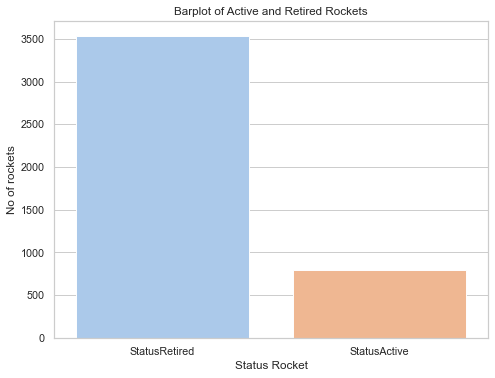

In [23]:
figure(figsize=(8,6),dpi=70)
plot1=sns.barplot(x= 'Status_Rocket',y= 'Satellite',data=df1.head(50),palette='pastel')
plt.xlabel("Status Rocket")
plt.ylabel("No of rockets")
plt.title("Barplot of Active and Retired Rockets")

# Type of Missions: Success, Failure, Partial Failure, Prelaunch Failure

In [24]:
df2 = df.groupby('Status_Mission').count()
df2.reset_index(inplace = True)
df2.sort_values(by = 'Satellite', ascending = False, inplace = True)

Text(0.5, 1.0, 'Barplot of Types of Missions')

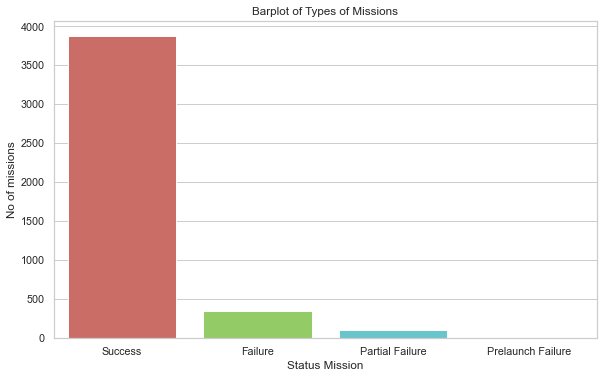

In [25]:
figure(figsize=(10,6), dpi=70)
plot2=sns.barplot(x= 'Status_Mission',y= 'Satellite',data=df2.head(50),palette='hls')
plt.xlabel("Status Mission")
plt.ylabel("No of missions")
plt.title("Barplot of Types of Missions")

Here we can see that success rate is very high and failure rate is quite low. However partial failure is very low and prelaunch failure is pretty less

# No of missions according to Countries

In [26]:
df3 = df.groupby('Countries').count()
df3.reset_index(inplace = True)
df3.sort_values(by = 'Satellite', ascending = False, inplace = True)

Text(0.5, 1.0, 'Barplot of Number of Missions according to Countries')

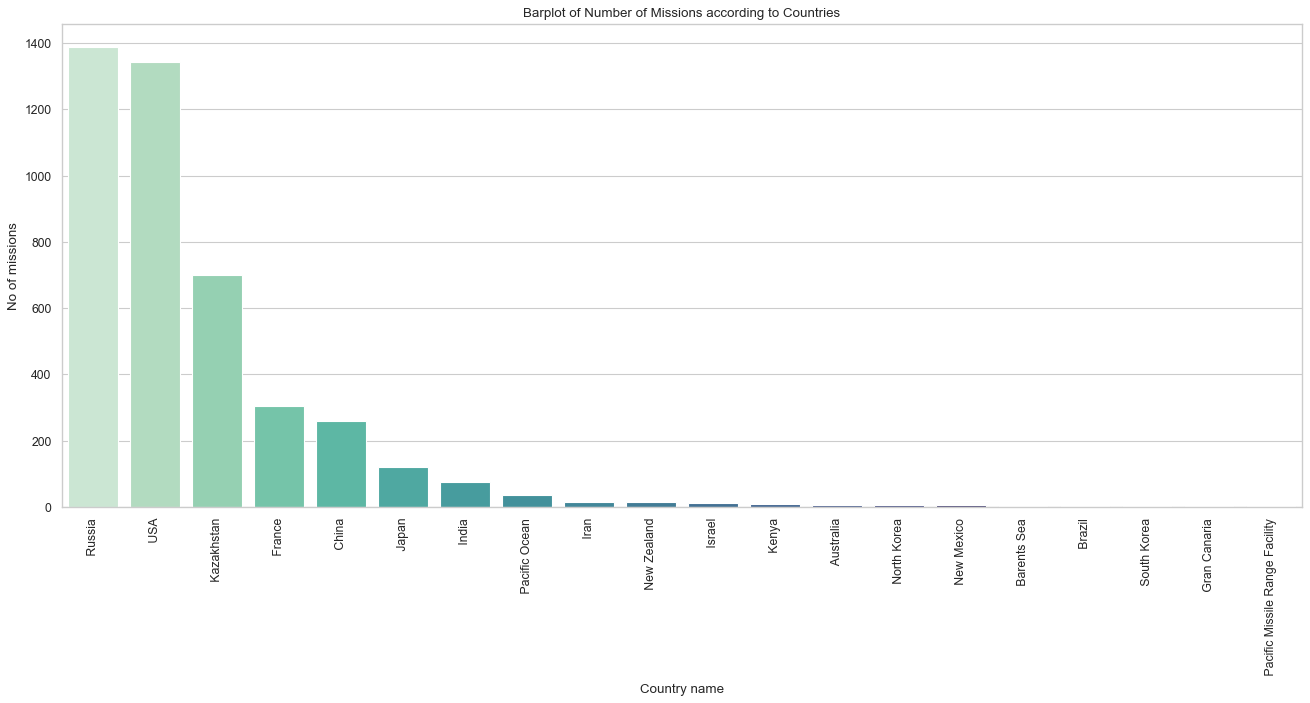

In [27]:
figure(figsize=(20,8), dpi=80)
plot = sns.barplot(x ='Countries' ,y ='Satellite' , data = df3.head(50), palette='mako_r')
plt.xticks(rotation=90)
plt.xlabel("Country name")
plt.ylabel("No of missions")
plt.title("Barplot of Number of Missions according to Countries")

Russia has done the highest missions followed closely USA

Following them are Kazakhstan, France, China and Japan

India comes 7th with respect to other countries in number of missions

# No of missions according to Locations

In [28]:
df4 = df.groupby('Location').count()
df4.reset_index(inplace = True)
df4.sort_values(by = 'Satellite', ascending = False, inplace = True)

Text(0.5, 1.0, 'Barplot of Number of Missions according to Locations')

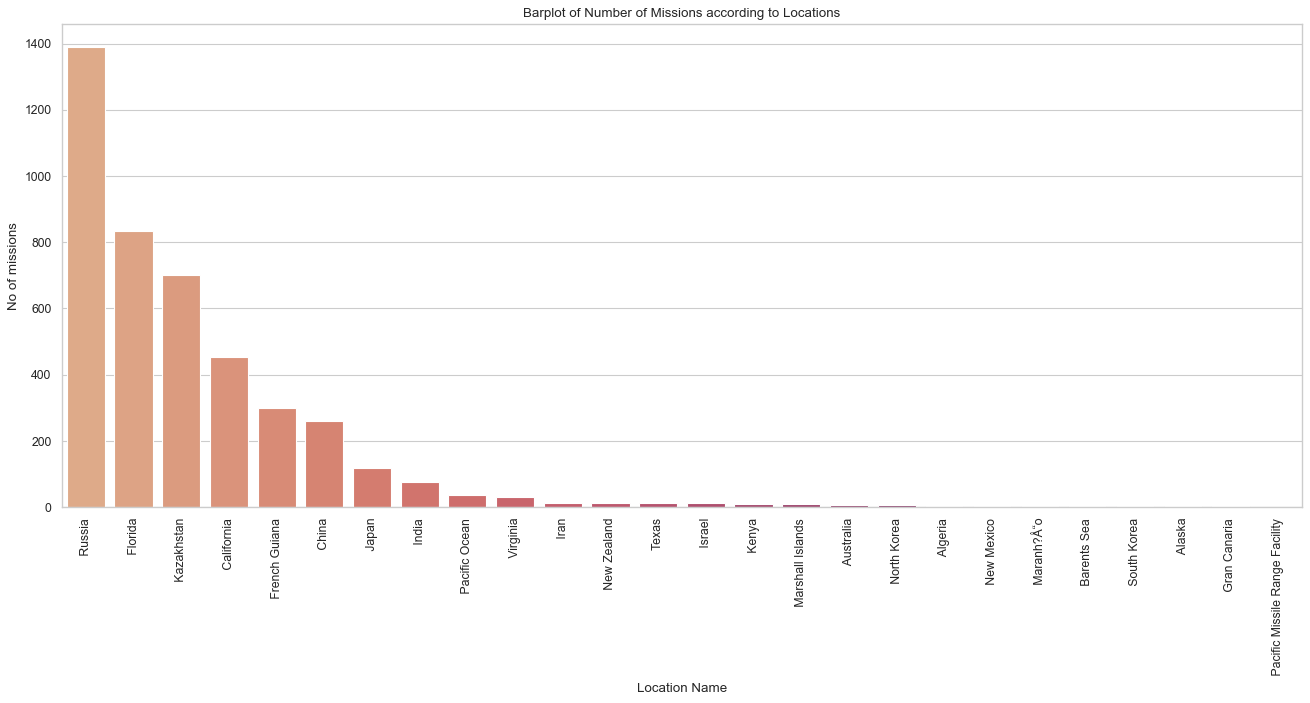

In [29]:
figure(figsize=(20,8), dpi=80)
plot = sns.barplot(x ='Location' , y ='Satellite',data = df4.head(50), palette='flare')
plt.xticks(rotation=90)
plt.xlabel("Location Name")
plt.ylabel("No of missions")
plt.title("Barplot of Number of Missions according to Locations")

# Total no of Launches from top 15 Space centers

In [30]:
df5 = df.groupby('Space_Centre').count()
df5.reset_index(inplace = True)
df5.sort_values(by = 'Satellite', ascending = False, inplace = True)

Text(0.5, 1.0, 'Barplot of Number of Missions according to Top 20 Space Centres')

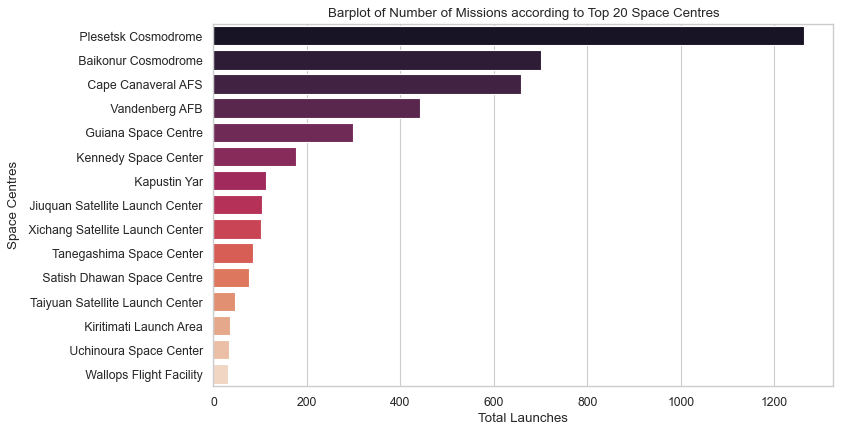

In [31]:
figure(figsize=(10,6), dpi=80)
plot = sns.barplot(x = 'Satellite', y ='Space_Centre',data = df5.head(15),palette='rocket')
plt.xlabel("Total Launches")
plt.ylabel("Space Centres")
plt.title("Barplot of Number of Missions according to Top 20 Space Centres")

Space centre Plesetsk Cosmodrome in Russia has the highest no of launches

# No of missions according to Top 50 Launch Complex

In [32]:
df6 = df.groupby('Launch_Complex').count()
df6.reset_index(inplace = True)
df6.sort_values(by = 'Satellite', ascending = False, inplace = True)

Text(0.5, 1.0, 'Barplot of Number of Missions according to Top 50 Launch Complex')

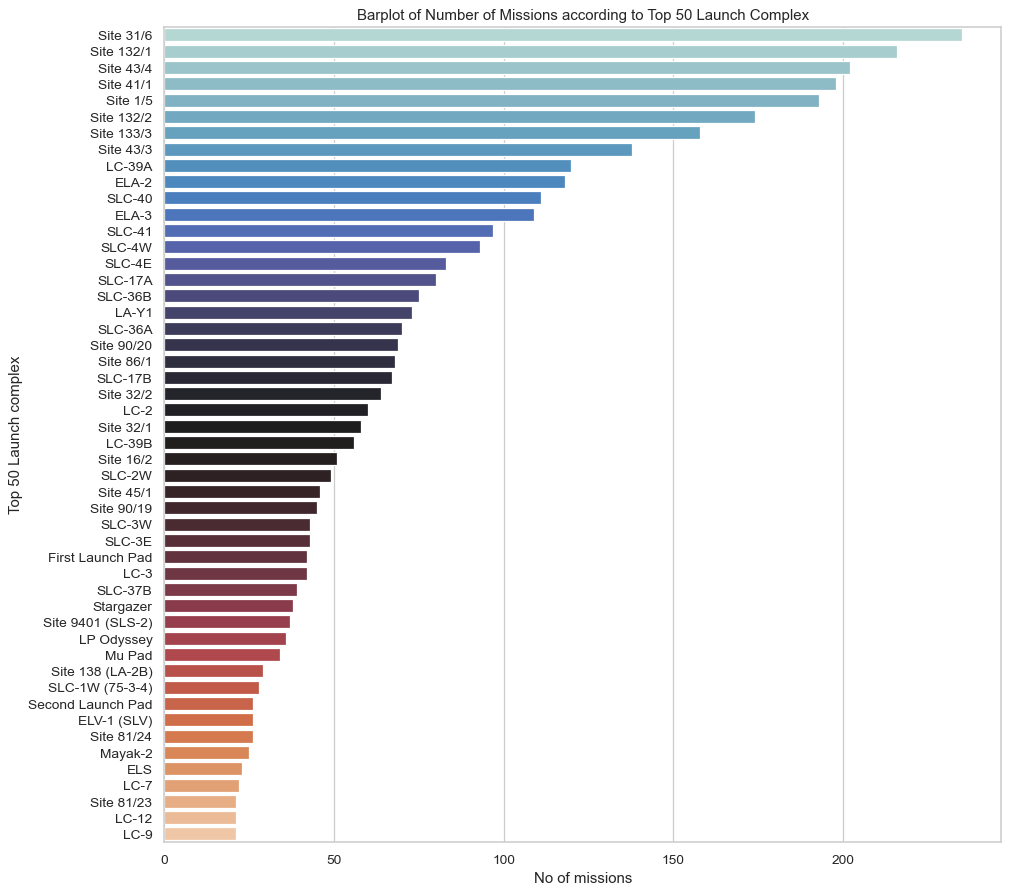

In [33]:
figure(figsize=(12,12), dpi=90)
plot = sns.barplot(x = 'Satellite', y ='Launch_Complex',data = df6.head(50),palette ='icefire')
plt.xlabel("No of missions")
plt.ylabel("Top 50 Launch complex")
plt.title("Barplot of Number of Missions according to Top 50 Launch Complex")

Site 31/6,in Kazakhstan has launched the highest missions 

# Total no of launches from top 50 launch vehicles

In [34]:
df7 = df.groupby('Launch_vehicle').count()
df7.reset_index(inplace = True)
df7.sort_values(by = 'Satellite', ascending = False, inplace = True)

Text(0.5, 1.0, 'Barplot of Total No of Launch per Vehicle')

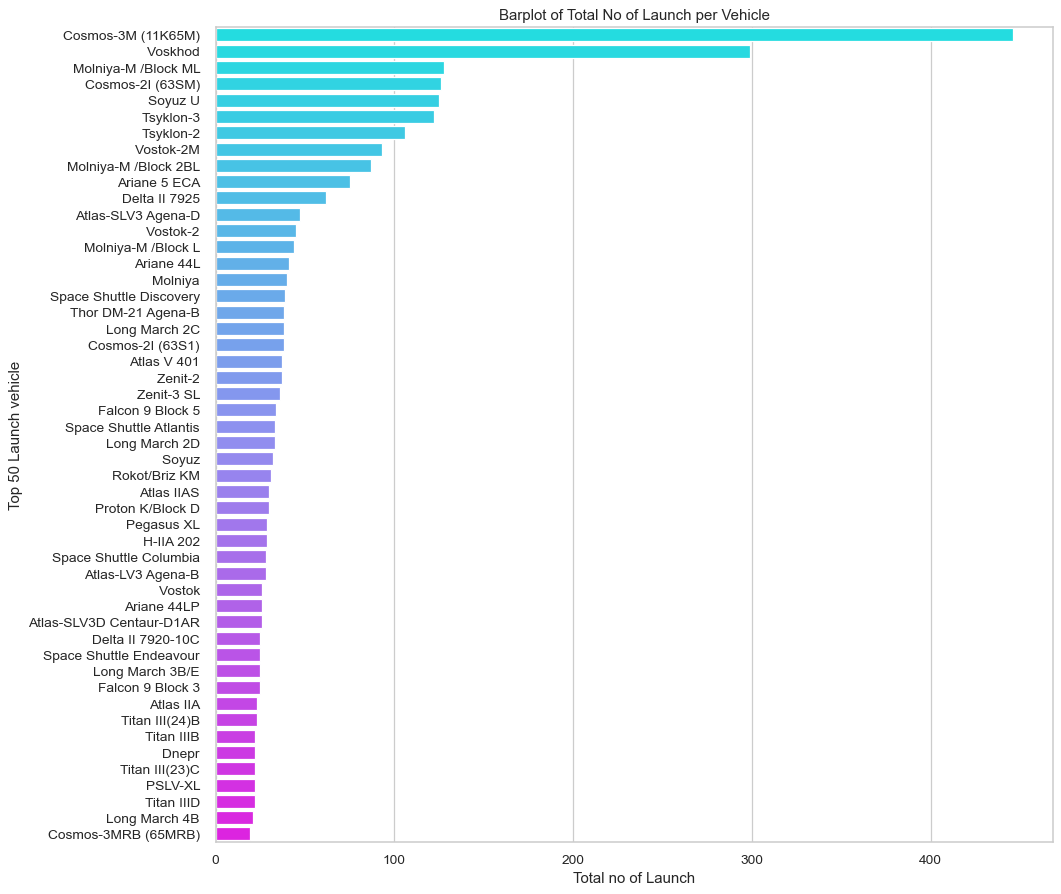

In [35]:
figure(figsize=(12,12), dpi=90)
plot = sns.barplot(x = 'Satellite', y='Launch_vehicle',data = df7.head(50),palette ='cool')
plt.xlabel("Total no of Launch")
plt.ylabel("Top 50 Launch vehicle")
plt.title("Barplot of Total No of Launch per Vehicle")

Cosmos-3M(11k65M) of Russia has highest number of launches

# Total Launches Each Year

In [36]:
df8 = df.groupby('Launch_Year').count()
df8.reset_index(inplace = True)
df8.sort_values(by = 'Satellite', ascending = False, inplace = True)

Text(0.5, 1.0, 'Barplot of Total No of Launches each year')

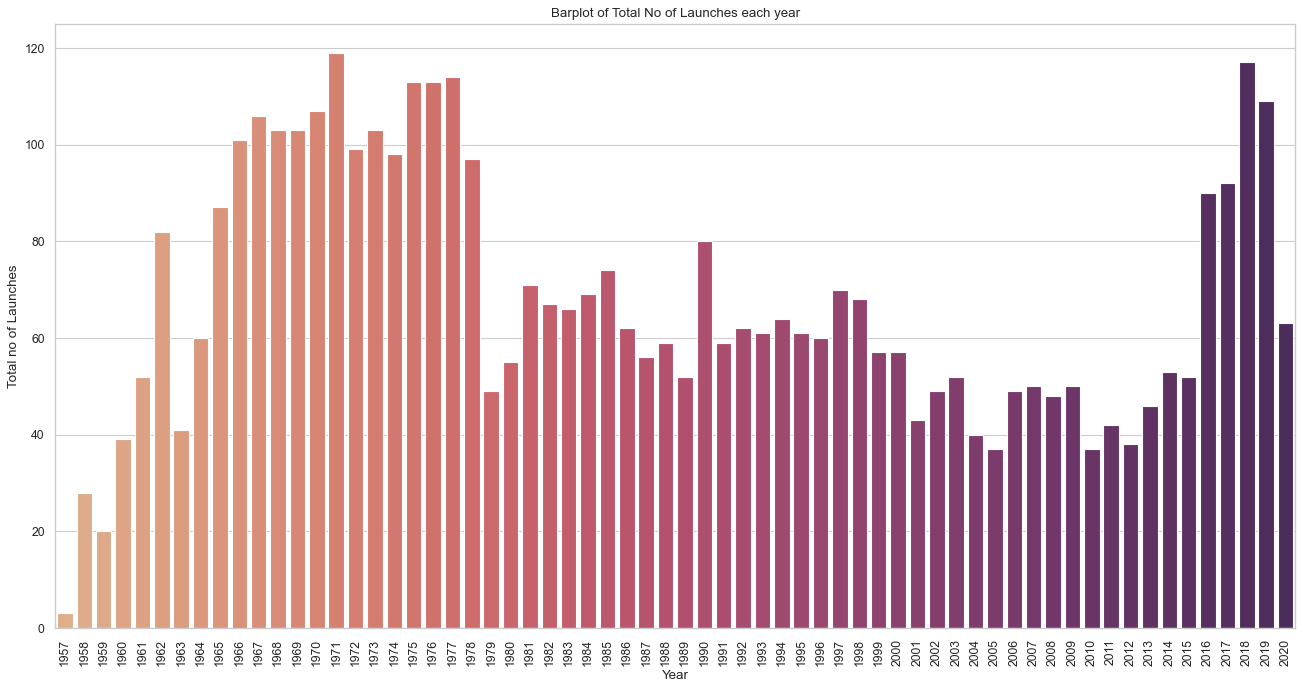

In [37]:
figure(figsize=(20,10), dpi=80)
plot = sns.barplot(x ='Launch_Year', y='Satellite',data = df8,palette ='flare')
plt.xticks(rotation=90)
plt.xlabel("Year")
plt.ylabel("Total no of Launches")
plt.title("Barplot of Total No of Launches each year")

A lot of launches took place in 1966-1978

Highest no of launches were in 1971 following it in 2018

# Total launches in each day a week since 1957

In [38]:
df9 = df.groupby('Launch_Day').count()
df9.reset_index(inplace = True)
df9.sort_values(by = 'Satellite', ascending = False, inplace = True)

Text(0.5, 1.0, 'Barplot of Total No of Launches each day')

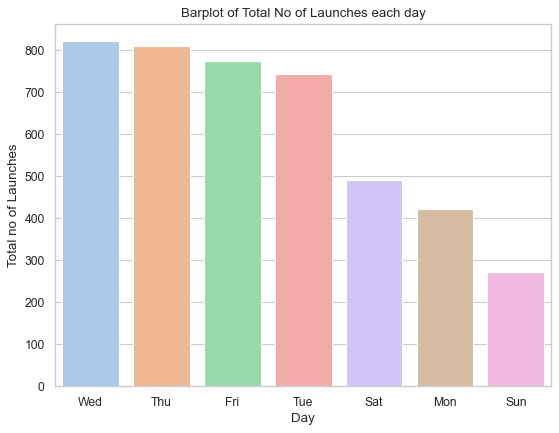

In [39]:
figure(figsize=(8,6), dpi=80)
plot = sns.barplot(x ='Launch_Day', y='Satellite',data = df9.head(50),palette ='pastel')
plt.xlabel("Day")
plt.ylabel("Total no of Launches")
plt.title("Barplot of Total No of Launches each day")

Most launches were on Wednesday since 1957

# Launch time

In [40]:
df10 = df.groupby('Time').count()
df10.reset_index(inplace = True)
df10.sort_values(by = 'Satellite', ascending = False, inplace = True)

Text(0.5, 1.0, 'Barplot of Launch Time')

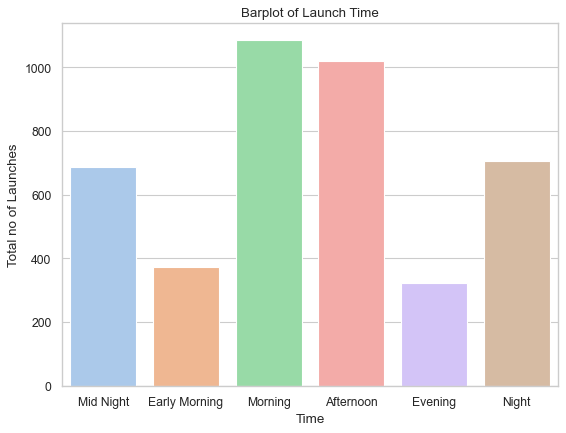

In [41]:
figure(figsize=(8,6), dpi=80)
plot = sns.barplot(x ='Time', y='Satellite',data = df10,palette ='pastel')
plt.xlabel("Time")
plt.ylabel("Total no of Launches")
plt.title("Barplot of Launch Time")

Most launches were in the Morning i.e 7:00 to 12:00 and then in the Afternoon i.e 12:00 to 18:00

# Relative Frequency Plot

In [42]:
def rel_bar(name,xlabel,ylabel,title) : 
    data = df[[ name ,'Status_Mission','Company_Name']].groupby([name,'Status_Mission']).count()
    data.reset_index(inplace = True)
    data = data.pivot(index = name,columns ='Status_Mission', values = 'Company_Name')
    data.fillna(value = 0, inplace = True)
    data = data.astype(int)
    data.sort_values(by='Success', ascending = False, inplace = True)
    data = data.head(50)
    
    data['Total'] = data.sum(axis=1)
    data['SuccessFraction'] = data['Success'] / data['Total']
    data['PrelaunchFraction'] = data['Prelaunch Failure'] / data['Total']
    data['PartialFraction'] = data['Partial Failure'] / data['Total']
    data['FailureFraction'] = data['Failure'] / data['Total']
# plotting
    plt.bar(data.index, data.SuccessFraction, color = 'green')
    plt.bar(data.index, data.PrelaunchFraction,bottom=data.SuccessFraction, color ='yellow')
    plt.bar(data.index, data.PartialFraction,bottom = data.SuccessFraction + data.PrelaunchFraction, color = 'blue')
    plt.bar(data.index, data.FailureFraction,bottom = data.SuccessFraction + data.PrelaunchFraction + data.PartialFraction, color = 'red' )
    plt.xticks(rotation= 90)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(['success','prelaunch failure','partial failure','failure'],bbox_to_anchor=(1.2, 1), shadow=True)

# Relative frequency plot of no of missions according to Countries

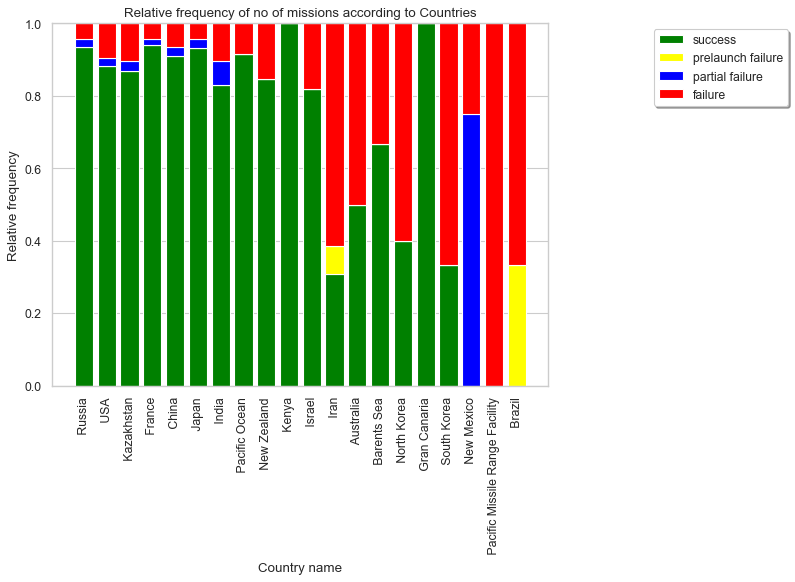

In [43]:
figure(figsize=(8,6), dpi=80)
rel_bar('Countries','Country name','Relative frequency','Relative frequency of no of missions according to Countries')

From the relative freq plot you can see that though Russia has launched more missions than USA still there success Rate is higher than USA

From the top 10 countries India has the highest Partial Failure Rate

# Relative frequency plot of no of missions according to locations

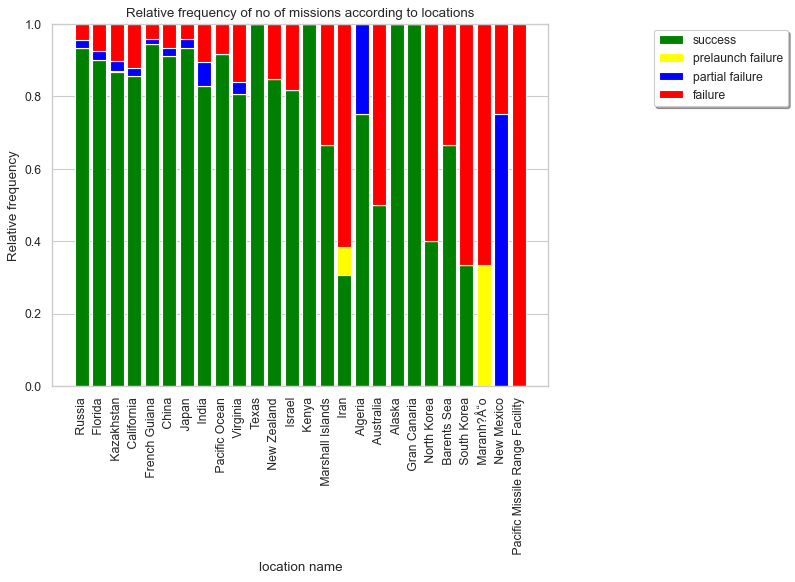

In [44]:
figure(figsize=(8,6), dpi=80)
rel_bar('Location','location name','Relative frequency','Relative frequency of no of missions according to locations')

# Relative frequency plot of no of missions according to top 50 launch complex

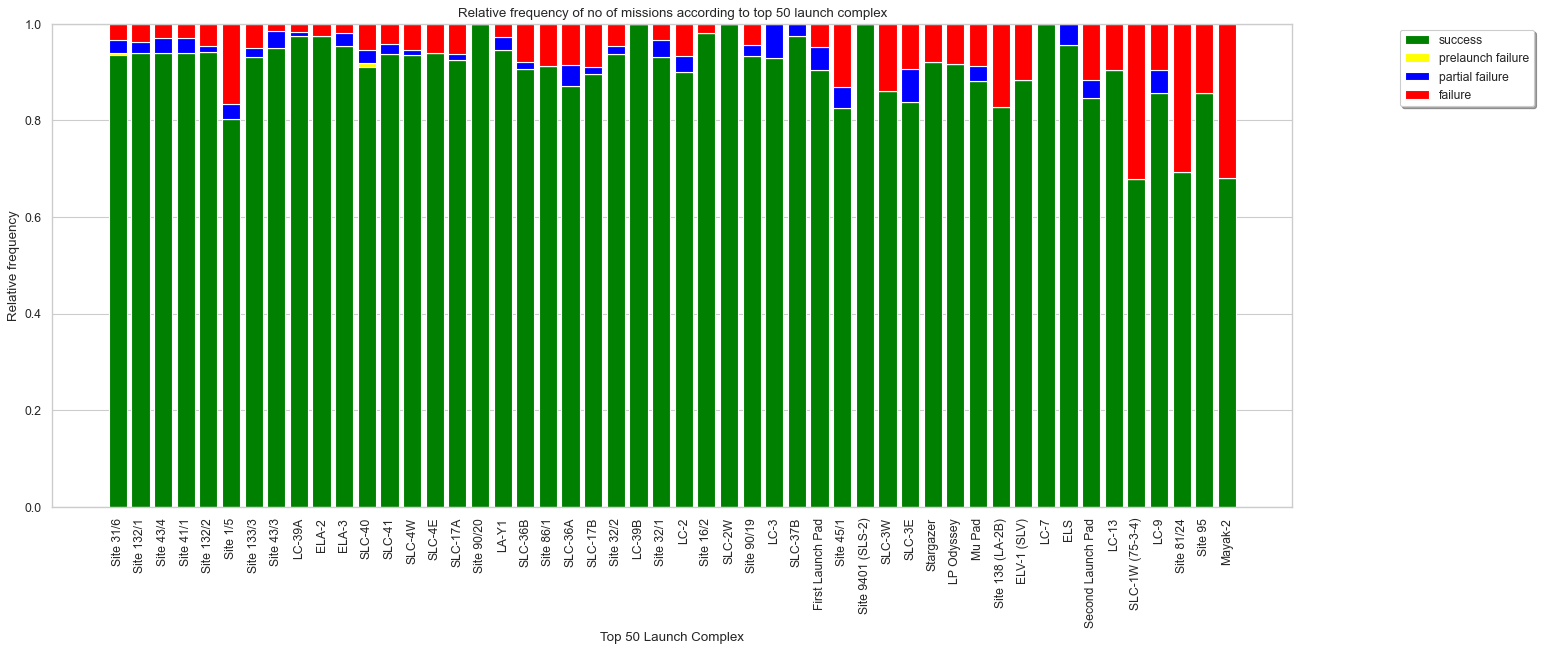

In [45]:
figure(figsize=(20,8), dpi=80)
rel_bar('Launch_Complex','Top 50 Launch Complex','Relative frequency','Relative frequency of no of missions according to top 50 launch complex')

Among the top 10 launch complexes Site 1/5 has the highest Failure Rate

Site 1/5 is also in Kazakhstan

# Relative frequency plot of Total Launches Each Year

In [46]:
ly = df[['Launch_Year','Status_Mission','Company_Name']].groupby(['Launch_Year','Status_Mission']).count()
ly.reset_index(inplace = True)
ly = ly.pivot(index ='Launch_Year', columns ='Status_Mission', values = 'Company_Name')
ly.fillna(value = 0, inplace = True)
ly = ly.astype(int)
ly.sort_values(by='Success', ascending = False, inplace = True)
ly['Total'] = ly.sum(axis=1)
ly['SuccessFraction'] = ly['Success'] / ly['Total']
ly['PrelaunchFraction'] = ly['Prelaunch Failure'] / ly['Total']
ly['PartialFraction'] = ly['Partial Failure'] / ly['Total']
ly['FailureFraction'] = ly['Failure'] / ly['Total']

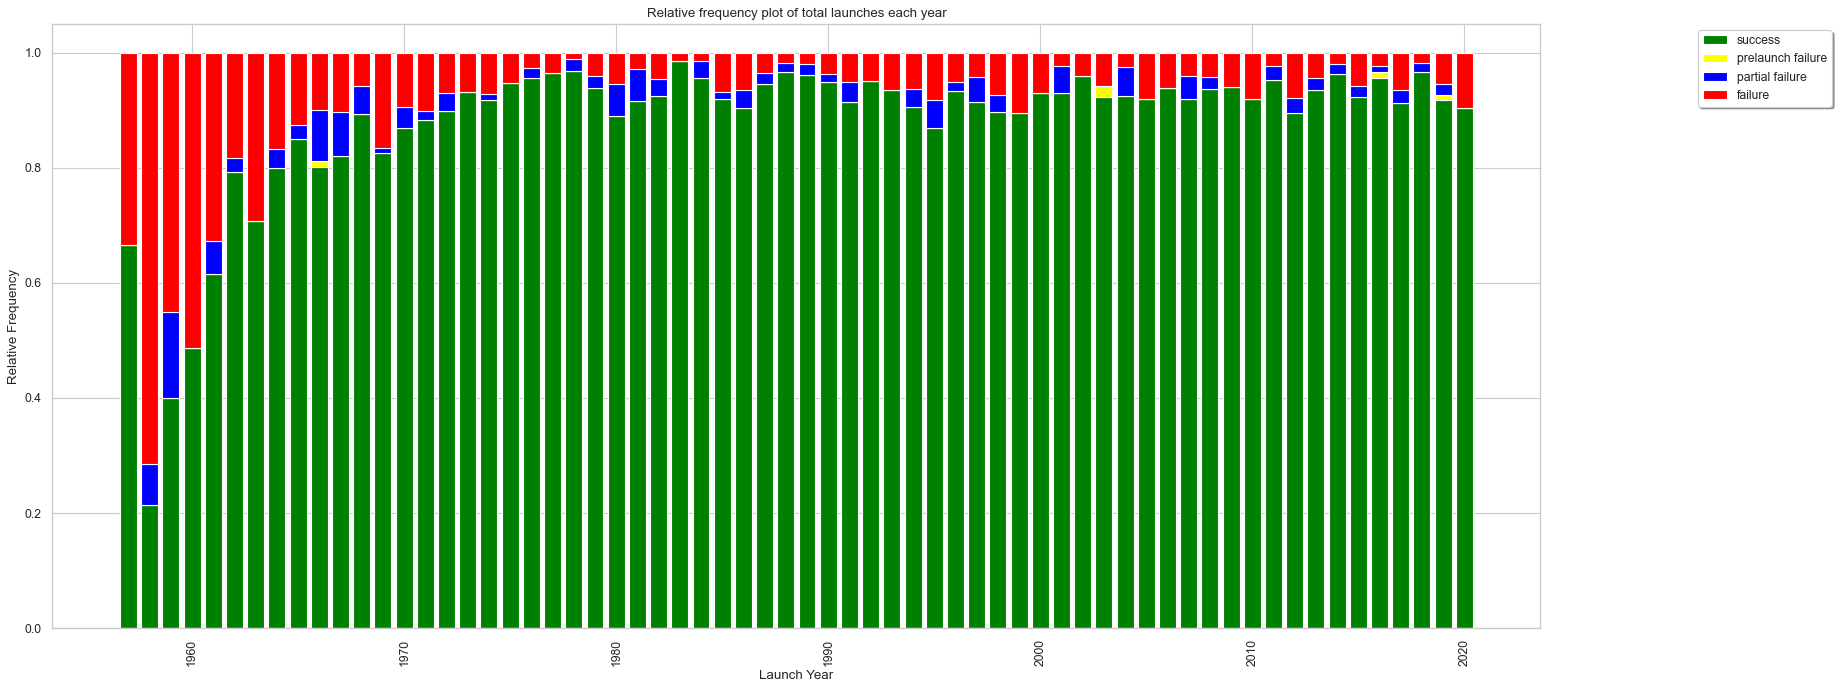

In [47]:
figure(figsize=(24,10), dpi=80)
plt.bar(ly.index, ly.SuccessFraction, color = 'green')
plt.bar(ly.index, ly.PrelaunchFraction,bottom=ly.SuccessFraction, color ='yellow')
plt.bar(ly.index, ly.PartialFraction,bottom = ly.SuccessFraction + ly.PrelaunchFraction, color = 'blue')
plt.bar(ly.index, ly.FailureFraction,bottom = ly.SuccessFraction + ly.PrelaunchFraction + ly.PartialFraction, color = 'red' )
plt.xticks(rotation= 90)
plt.xlabel('Launch Year')
plt.ylabel('Relative Frequency')
plt.title('Relative frequency plot of total launches each year')
plt.legend(['success','prelaunch failure','partial failure','failure'],bbox_to_anchor=(1.2, 1), shadow=True)

Before 1970 Failure Rate was very high

# Money spent by all Companies

Company name

In [48]:
df.Company_Name.unique()

array(['SpaceX', 'CASC', 'Roscosmos', 'ULA', 'JAXA', 'Northrop', 'ExPace',
       'IAI', 'Rocket Lab', 'Virgin Orbit', 'VKS RF', 'MHI', 'IRGC',
       'Arianespace', 'ISA', 'Blue Origin', 'ISRO', 'Exos', 'ILS',
       'i-Space', 'OneSpace', 'Landspace', 'Eurockot', 'Land Launch',
       'CASIC', 'KCST', 'Sandia', 'Kosmotras', 'Khrunichev', 'Sea Launch',
       'KARI', 'ESA', 'NASA', 'Boeing', 'ISAS', 'SRC', 'MITT', 'Lockheed',
       'AEB', 'Starsem', 'RVSN USSR', 'EER', 'General Dynamics',
       'Martin Marietta', 'Yuzhmash', 'Douglas', 'ASI', 'US Air Force',
       'CNES', 'CECLES', 'RAE', 'UT', 'OKB-586', 'AMBA',
       "Arm??e de l'Air", 'US Navy'], dtype=object)

Money spent by companies

Text(0.5, 1.0, 'Money Spent by all Companies')

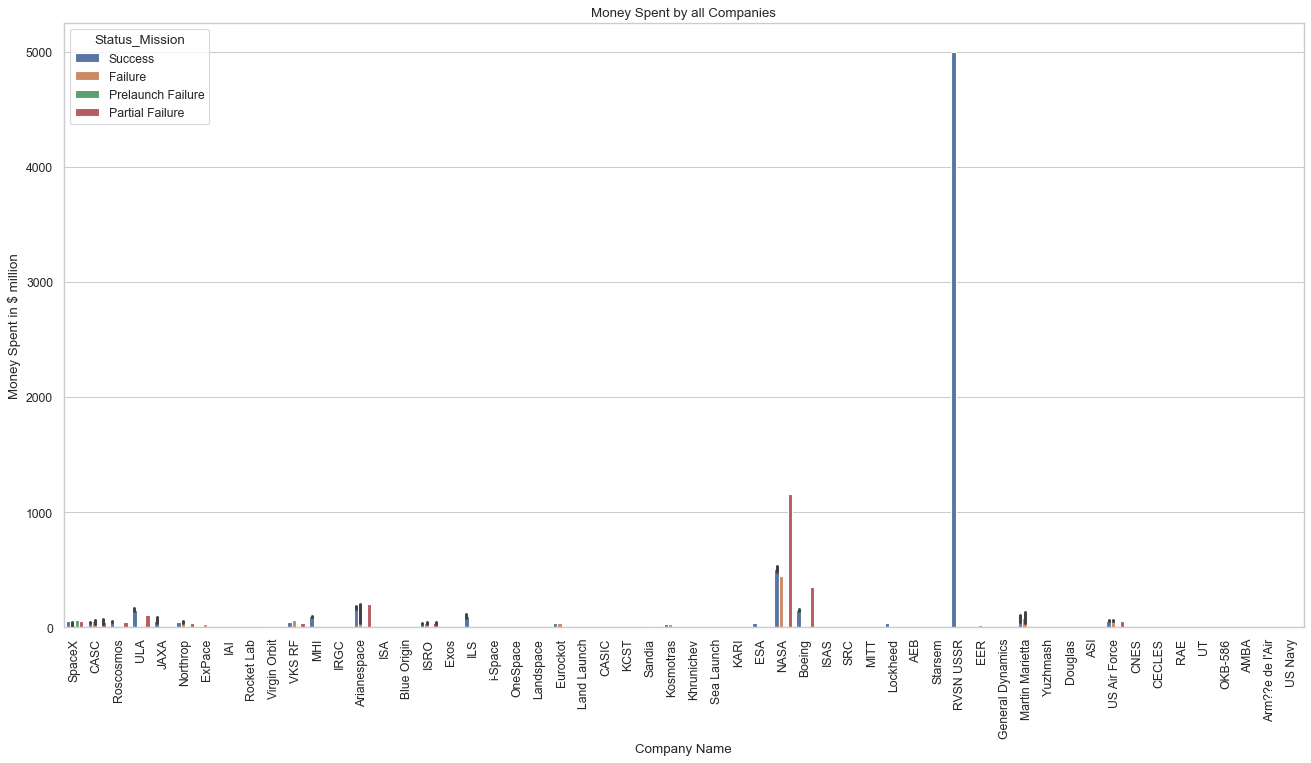

In [49]:
figure(figsize=(20,10), dpi=80)
sns.barplot(x='Company_Name', y='Mission_Cost',hue ='Status_Mission',data =df)
plt.xticks(rotation=90)
plt.xlabel('Company Name')
plt.ylabel('Money Spent in $ million')
plt.title('Money Spent by all Companies')

RVSN USSR has spent the most money

In [54]:
df11=df.replace({'Failure': 0,'Prelaunch Failure': 0,'Partial Failure': 0, 'Success': 1})
df11

,Company_Name,Location,Status_Rocket,Mission_Cost,Status_Mission,Countries,Space_Centre,Launch_Complex,Launch_Date,Launch_Month,Launch_Year,Launch_Time,Launch_Day,Time,Launch_vehicle,Satellite
0,SpaceX,Florida,StatusActive,50.00,1,USA,Kennedy Space Center,LC-39A,7,Aug,2020,5.12,Fri,Early Morning,Falcon 9 Block 5,Starlink V1 L9 & BlackSky
1,CASC,China,StatusActive,29.75,1,China,Jiuquan Satellite Launch Center,Site 9401 (SLS-2),6,Aug,2020,4.01,Thu,Mid Night,Long March 2D,Gaofen-9 04 & Q-SAT
2,SpaceX,Texas,StatusActive,NaN,1,USA,Boca Chica,Pad A,4,Aug,2020,23.57,Tue,Night,Starship Prototype,150 Meter Hop
3,Roscosmos,Kazakhstan,StatusActive,65.00,1,Kazakhstan,Baikonur Cosmodrome,Site 200/39,30,Jul,2020,21.25,Thu,Night,Proton-M/Briz-M,Ekspress-80 & Ekspress-103
4,ULA,Florida,StatusActive,145.00,1,USA,Cape Canaveral AFS,SLC-41,30,Jul,2020,11.50,Thu,Morning,Atlas V 541,Perseverance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,Florida,StatusRetired,NaN,0,USA,Cape Canaveral AFS,LC-18A,5,Feb,1958,7.33,Wed,Morning,Vanguard,Vanguard TV3BU
4320,AMBA,Florida,StatusRetired,NaN,1,USA,Cape Canaveral AFS,LC-26A,1,Feb,1958,3.48,Sat,Mid Night,Juno I,Explorer 1
4321,US Navy,Florida,StatusRetired,NaN,0,USA,Cape Canaveral AFS,LC-18A,6,Dec,1957,16.44,Fri,Afternoon,Vanguard,Vanguard TV3
4322,RVSN USSR,Kazakhstan,StatusRetired,NaN,1,Kazakhstan,Baikonur Cosmodrome,Site 1/5,3,Nov,1957,2.30,Sun,Mid Night,Sputnik 8K71PS,Sputnik-2


<AxesSubplot:>

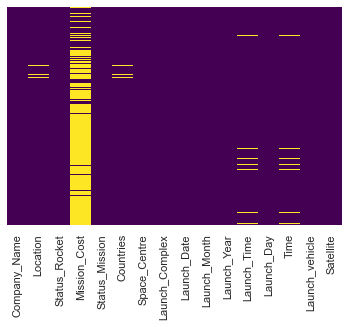

In [55]:
sns.heatmap(df11.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [56]:
df11['Status_Mission'].value_counts()

1    3879
0     445
Name: Status_Mission, dtype: int64

<AxesSubplot:xlabel='Status_Mission', ylabel='count'>

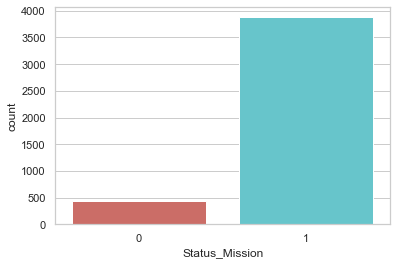

In [57]:
sns.countplot(x='Status_Mission',data=df11,palette ='hls')

In [58]:
df11.drop(['Company_Name','Location','Countries','Space_Centre','Launch_Complex','Launch_Date','Launch_Month','Launch_Year','Launch_Time','Launch_Day','Launch_vehicle','Satellite'], axis=1,inplace=True)

In [59]:
df11

,Status_Rocket,Mission_Cost,Status_Mission,Time
0,StatusActive,50.00,1,Early Morning
1,StatusActive,29.75,1,Mid Night
2,StatusActive,NaN,1,Night
3,StatusActive,65.00,1,Night
4,StatusActive,145.00,1,Morning
...,...,...,...,...
4319,StatusRetired,NaN,0,Morning
4320,StatusRetired,NaN,1,Mid Night
4321,StatusRetired,NaN,0,Afternoon
4322,StatusRetired,NaN,1,Mid Night


In [60]:
pd.get_dummies(df11['Status_Rocket'])

,StatusActive,StatusRetired
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
4319,0,1
4320,0,1
4321,0,1
4322,0,1


In [61]:
Status_Rocket = pd.get_dummies(df11['Status_Rocket'],drop_first = True) # dropping first column
Status_Rocket.head(5)

,StatusRetired
0,0
1,0
2,0
3,0
4,0


In [62]:
binary_time = pd.get_dummies(df11['Time'])
binary_time

,Mid Night,Early Morning,Morning,Afternoon,Evening,Night
0,0,1,0,0,0,0
1,1,0,0,0,0,0
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,1,0,0,0
...,...,...,...,...,...,...
4319,0,0,1,0,0,0
4320,1,0,0,0,0,0
4321,0,0,0,1,0,0
4322,1,0,0,0,0,0


In [63]:
#adding all the created dummy variable in to old data frame
df11 = pd.concat([df11,binary_time,Status_Rocket],axis = 1)
df11.head()

,Status_Rocket,Mission_Cost,Status_Mission,Time,Mid Night,Early Morning,Morning,Afternoon,Evening,Night,StatusRetired
0,StatusActive,50.00,1,Early Morning,0,1,0,0,0,0,0
1,StatusActive,29.75,1,Mid Night,1,0,0,0,0,0,0
2,StatusActive,NaN,1,Night,0,0,0,0,0,1,0
3,StatusActive,65.00,1,Night,0,0,0,0,0,1,0
4,StatusActive,145.00,1,Morning,0,0,1,0,0,0,0


In [64]:
df11.drop(['Status_Rocket','Time'],axis=1,inplace=True)
df11.head()

,Mission_Cost,Status_Mission,Mid Night,Early Morning,Morning,Afternoon,Evening,Night,StatusRetired
0,50.00,1,0,1,0,0,0,0,0
1,29.75,1,1,0,0,0,0,0,0
2,NaN,1,0,0,0,0,0,1,0
3,65.00,1,0,0,0,0,0,1,0
4,145.00,1,0,0,1,0,0,0,0


In [65]:
df11.dropna(inplace=True)

In [66]:
df11.head()

,Mission_Cost,Status_Mission,Mid Night,Early Morning,Morning,Afternoon,Evening,Night,StatusRetired
0,50.00,1,0,1,0,0,0,0,0
1,29.75,1,1,0,0,0,0,0,0
3,65.00,1,0,0,0,0,0,1,0
4,145.00,1,0,0,1,0,0,0,0
5,64.68,1,1,0,0,0,0,0,0


In [68]:
df11.isnull().sum()

Mission_Cost      0
Status_Mission    0
Mid Night         0
Early Morning     0
Morning           0
Afternoon         0
Evening           0
Night             0
StatusRetired     0
dtype: int64

Splitting the data in train and test set

In [69]:
x = df11.drop("Status_Mission",axis = 1)  #independent variable
y = df11["Status_Mission"]   #dependent variable

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
#test size 0.2 indicates 80:20 training and test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 1)

FITTING LOGISTIC REGRESSION

In [72]:

from sklearn.linear_model import LogisticRegression

In [73]:
logreg = LogisticRegression()

In [74]:
logreg.fit(x_train,y_train)

LogisticRegression()

In [75]:
pred=logreg.predict(x_test) #making prediction

Performance checking of the model

In [76]:

logreg.score(x_test,y_test) #by using score

0.9585492227979274

In [77]:
from sklearn.metrics import classification_report

In [78]:
print(classification_report(y_test,pred)) # by using classification report

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.96      1.00      0.98       185

    accuracy                           0.96       193
   macro avg       0.48      0.50      0.49       193
weighted avg       0.92      0.96      0.94       193



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
from sklearn.metrics import confusion_matrix

In [80]:
tn, fp, fn, tp = confusion_matrix(y_test,pred).ravel()
(tn, fp, fn, tp)

(0, 8, 0, 185)

In [81]:
cnf_matrix = confusion_matrix(y_test,pred)

In [82]:
cnf_matrix

array([[  0,   8],
       [  0, 185]], dtype=int64)

NameError: name 'ax' is not defined

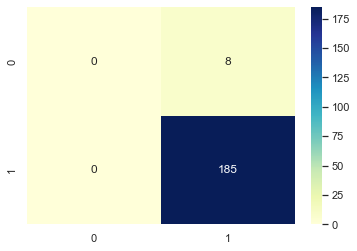

In [83]:
#heatmap for confusion matrix
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [84]:
#another method to check accuracy
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, pred))
print("Precision:",metrics.precision_score(y_test,pred))
print("Recall:",metrics.recall_score(y_test,pred))

Accuracy: 0.9585492227979274
Precision: 0.9585492227979274
Recall: 1.0


ROC CURVE

In [85]:
y_pred_proba = logreg.predict_proba(x_test)[::,1]
y_pred_proba

array([0.96165332, 0.98689201, 0.96408483, 0.89546662, 0.96008013,
       0.95577921, 0.99134621, 0.92877287, 0.92877287, 0.82447789,
       0.89550634, 0.97808937, 0.84346987, 0.91729852, 0.86442397,
       0.8176891 , 0.91620904, 0.98689201, 0.97808937, 0.95747108,
       0.93699736, 0.90852764, 0.99469525, 0.95572172, 0.97808937,
       0.90516582, 0.89783989, 0.9296002 , 0.90804303, 0.82447789,
       0.98689201, 0.94664073, 0.95333737, 0.96994845, 0.93759652,
       0.97808937, 0.89550634, 0.99192211, 0.95541874, 0.84121341,
       0.89546662, 0.93649157, 0.94778017, 0.97808937, 0.89783989,
       0.94679445, 0.93639284, 0.96450557, 0.96450557, 0.99192211,
       0.97808937, 0.93648103, 0.89546662, 0.88454168, 0.9296002 ,
       0.98689201, 0.99188016, 0.98689201, 0.99192211, 0.96165332,
       0.97797717, 0.81153105, 0.94153845, 0.9022925 , 0.92836447,
       0.97349252, 0.95829365, 0.87219377, 0.93360781, 0.81153105,
       0.93360781, 0.97584034, 0.87478456, 0.87478456, 0.91862

In [86]:
#calculate auc 
auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

0.5628378378378378

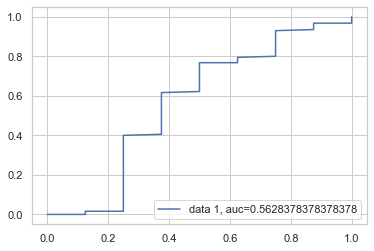

In [87]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()